In [ ]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 24.3 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [ ]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame.from_records(outputs)

,label,score
0,NEGATIVE,0.901546


Named Entity Recognition(NER)

In [ ]:

ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
pd.DataFrame.from_records(outputs)

,label,score
0,NEGATIVE,0.901546


In [ ]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame.from_records([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=65, clean_up_tokenization_spaces=True)
print(*outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


  B u m b l e b e e   o r d e r e d   a n   O p t i m u s   P r i m e   a c t i o n   f i g u r e   f r o m   y o u r   o n l i n e   s t o r e   i n   G e r m a n y .   U n f o r t u n a t e l y ,   w h e n   I   o p e n e d   t h e   p a c k a g e ,   I   d i s c o v e r e d   t o   m y   h o r r o r   t h a t   I   h a d   b e e n   s e n t   a n   a c t i o n   f i g u r e   o f   M e g a t r o n   i n s t e a d .   A s   a   l i f e l o n g   e n e m y   o f   t h e   D e c e p t i c o n s ,   I   h o p e   y o u   c a n   u n d e r s t a n d   m y   d i l e m m a .


In [ ]:
translator = pipeline("translation_en_to_de", model="t5-small")

In [ ]:
text = "Hello world, this is just a demo text"

In [ ]:
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=1)

In [ ]:
print(outputs)

[{'translation_text': 'Hallo Welt, dies ist nur ein Demotext'}]


In [ ]:
from datasets import list_datasets

In [ ]:
all_datasets = list_datasets()
print(f"currently there are {len(all_datasets)} in the datasets")
print(f"the top ten datsets are {all_datasets[:10]}")

In [ ]:
print(*all_datasets[23:50],sep="\t\n")

ar_cov19	
ar_res_reviews	
ar_sarcasm	
arabic_billion_words	
arabic_pos_dialect	
arabic_speech_corpus	
arcd	
arsentd_lev	
art	
arxiv_dataset	
ascent_kb	
aslg_pc12	
asnq	
asset	
assin	
assin2	
atomic	
autshumato	
facebook/babi_qa	
banking77	
bbaw_egyptian	
bbc_hindi_nli	
bc2gm_corpus	
beans	
best2009	
bianet	
bible_para


In [ ]:
from datasets import load_dataset
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
emotions.get('train')

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
train_ds=  emotions["train"]

In [ ]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [ ]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyarrow as pa

In [ ]:
import pandas as pd
df  = pd.DataFrame(train_ds[:10
                      ])

In [ ]:
tables = pa.Table.from_pandas(df)

Clearly pyarrow tables are much more memory efficient

In [ ]:
import sys
sys.getsizeof(tables),sys.getsizeof(df)

(844, 1462)

In [ ]:
print(train_ds.features, sep='\n')

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
print(train_ds[:5].items())

dict_items([('text', ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']), ('label', [0, 0, 3, 2, 3])])


In [ ]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?"
!wget{dataset_url}

/bin/bash: wgethttps://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?: No such file or directory


In [ ]:
import pandas as pd

emotions.set_format(type = 'pandas')
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [ ]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
import matplotlib.pyplot as plt



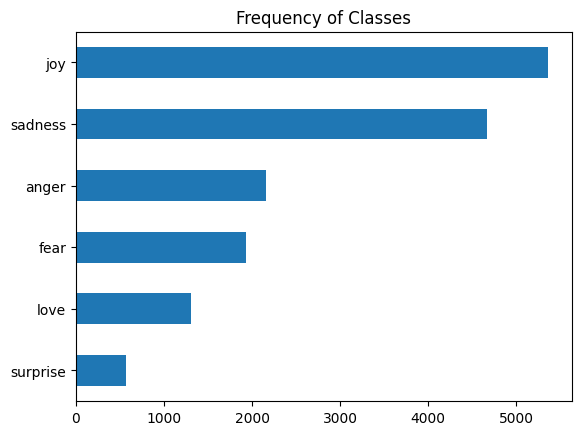

In [ ]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

How long are out Tweets?

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

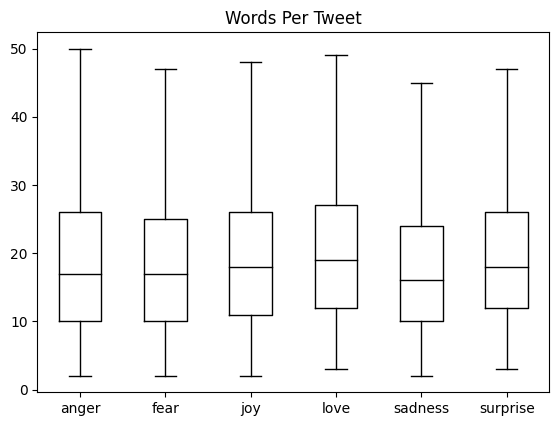

In [ ]:
df.boxplot("Words Per Tweet", by="label_name", grid=False,showfliers=False,color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()